## 전처리

In [5]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew 
from scipy.stats import boxcox
%matplotlib inline

In [6]:
df = pd.read_csv('heart_2020_cleaned.csv')
# remove duplicated data
df = df.drop_duplicates()
# noise 처리
df = df[(df['BMI'] < 80) & (df['SleepTime'] != 24)]
print(df.shape)

(301653, 18)


In [7]:
def yesno_tolabel(x):
    if (x == 'Yes') | (x == 'Yes (during pregnancy)') :
        return 1
    else:
        return 0

In [8]:
sex_map = {'Female' : 0, 'Male' : 1}
health_map = {'Excellent' : 4, 'Very good' : 3, 'Good' : 2, 'Fair' : 1, 'Poor' : 0}
diabetic_map = {'Yes' : 2, 'Yes (during pregnancy)' : 2, 'No, borderline diabetes' : 1, 'No' : 0}
age_map = {'18-24' : 20, '25-29' : 25, '30-34' : 30, '35-39' : 35, '40-44' : 40, '45-49' : 45, '50-54' : 50, '55-59' : 55, '60-64' : 60, '65-69' : 65, '70-74' : 70, '75-79' : 75, '80 or older' : 80}
columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
diabetic_map = {'Yes' : 2, 'Yes (during pregnancy)' : 2, 'No, borderline diabetes' : 1, 'No' : 0}
for column in columns:
    df[column] = df[column].apply(lambda x : yesno_tolabel(x))

df['Sex'] = df['Sex'].map(sex_map)
df['GenHealth'] = df['GenHealth'].map(health_map)
df['Diabetic'] = df['Diabetic'].map(diabetic_map)
df['AgeCategory'] = df['AgeCategory'].map(age_map)

In [9]:
# outliter
def quantile_operation(outlier_df, column):
    quantile_1 = outlier_df[column].quantile(0.25)
    quantile_3 = outlier_df[column].quantile(0.75)
    iqr = quantile_3 - quantile_1
    Lower_tail = quantile_1 - 1.5 * iqr
    Upper_tail = quantile_3 + 1.5 * iqr

    return Lower_tail, Upper_tail

In [10]:
df['PhysicalHealth'] = df['PhysicalHealth'] + 1
df['MentalHealth'] = df['MentalHealth'] + 1
outlier_columns = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
for column in outlier_columns:
    Lower_tail, Upper_tail = quantile_operation(df, column)
    df[column] = boxcox(df[column])[0]

In [11]:
#Race 인코딩 - target encoding
categories = df['Race'].unique()
targets = df['HeartDisease'].unique()
cat_list = []

for cat in categories:
    aux_dict = {}
    aux_dict['category'] = cat
    aux_df = df[df['Race'] == cat]
    counts = aux_df['HeartDisease'].value_counts()
    aux_dict['count'] = sum(counts)
    for t in targets:
        aux_dict['Race_' + str(t)] = counts[t]
    cat_list.append(aux_dict)

cat_list = pd.DataFrame(cat_list)
cat_list['genre_encoded_dumb'] = cat_list['Race_1'] / cat_list['count']

target_dict = {'White' : cat_list['genre_encoded_dumb'][0], 'Black' : cat_list['genre_encoded_dumb'][1], 'Asian' : cat_list['genre_encoded_dumb'][2], 'American Indian/Alaskan Native' : cat_list['genre_encoded_dumb'][3],
               'Other' : cat_list['genre_encoded_dumb'][4], 'Hispanic' : cat_list['genre_encoded_dumb'][5]}
df['Race_encoder'] = df['Race'].map(target_dict)

df.drop(['Race'], axis = 1, inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301653 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301653 non-null  int64  
 1   BMI               301653 non-null  float64
 2   Smoking           301653 non-null  int64  
 3   AlcoholDrinking   301653 non-null  int64  
 4   Stroke            301653 non-null  int64  
 5   PhysicalHealth    301653 non-null  float64
 6   MentalHealth      301653 non-null  float64
 7   DiffWalking       301653 non-null  int64  
 8   Sex               301653 non-null  int64  
 9   AgeCategory       301653 non-null  int64  
 10  Diabetic          301653 non-null  int64  
 11  PhysicalActivity  301653 non-null  int64  
 12  GenHealth         301653 non-null  int64  
 13  SleepTime         301653 non-null  float64
 14  Asthma            301653 non-null  int64  
 15  KidneyDisease     301653 non-null  int64  
 16  SkinCancer        30

In [13]:
# x, y분리
x = df.drop('HeartDisease', axis=1)
x_columns = x.columns
y = df['HeartDisease']

# train test 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2,random_state = 42)

In [14]:
import joblib
svm_adasyn_model = joblib.load('./Target_model/svm_adasyn_model.pkl')
svm_border_model = joblib.load('./Target_model/svm_border_model.pkl')
svm_weight_model = joblib.load('./Target_model/svm_model_weight.pkl')
svm_smote_model = joblib.load('./Target_model/svm_smote_model.pkl')
svm_smoteenn_model = joblib.load('./Target_model/svm_smoteenn_model.pkl')
svm_svmsmote_model = joblib.load('./Target_model/svm_svmsmote_model.pkl')

In [11]:
svm_smote_model.dual_coef_

array([[-1., -1., -1., ...,  1.,  1.,  1.]])

In [12]:
svm_smote_model.class_weight_

array([1., 1.])

In [4]:
svm_weight_model.dual_coef_

array([[-0.54956822, -0.54956822, -0.54956822, ...,  5.54355417,
         5.54355417,  5.54355417]])

In [14]:
svm_weight_model.class_weight_

array([0.54956822, 5.54355417])

<AxesSubplot:>

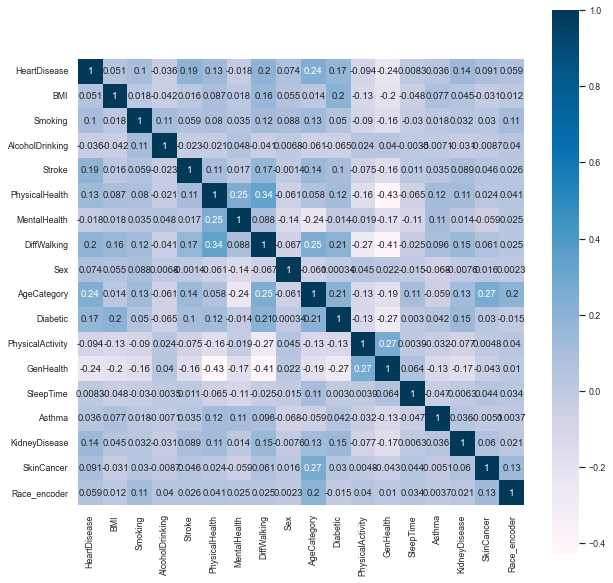

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 10))
sns.set(font_scale=.8)
sns.heatmap(data = df.corr(), square = True, linecolor = "white",cmap = plt.cm.PuBu, annot = True)

**시간이 오래 걸려 Target Encoding 적용 모델에 대해서만 진행 + ICE와 SHAP는 잘 실행되지 않음**

## Cost Sensitive Learning 모델의 PDPbox 

In [16]:
#import mpl_toolkit.mplot3d import Axes3D

In [17]:
from pdpbox import pdp
import shap
print(x_test.columns)
features = x_test.columns

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race_encoder'],
      dtype='object')


### BMI

In [20]:
from pdpbox import pdp
pdp_bmi = pdp.pdp_isolate(model=svm_weight_model, dataset=x_test, model_features=features, feature='BMI')

(<Figure size 1080x684 with 3 Axes>,
 {'title_ax': <AxesSubplot:>,
  'pdp_ax': {'_pdp_ax': <AxesSubplot:>,
   '_count_ax': <AxesSubplot:title={'center':'distribution of data points'}, xlabel='BMI'>}})

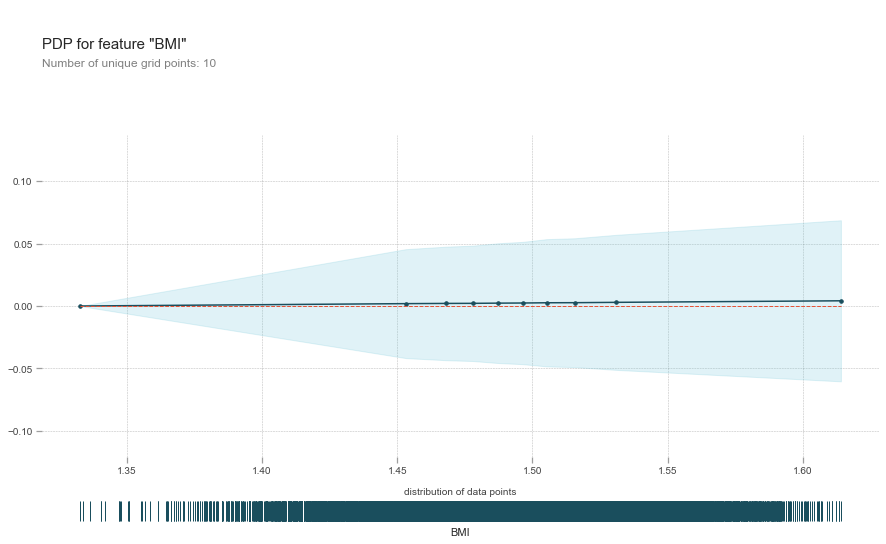

In [21]:
pdp.pdp_plot(pdp_bmi, 'BMI', plot_pts_dist=True)

### PhsicalHealth

In [22]:
from pdpbox import pdp
pdp_phsical = pdp.pdp_isolate(model=svm_weight_model, dataset=x_test, model_features=features, feature='PhysicalHealth')

(<Figure size 1080x684 with 3 Axes>,
 {'title_ax': <AxesSubplot:>,
  'pdp_ax': {'_pdp_ax': <AxesSubplot:>,
   '_count_ax': <AxesSubplot:title={'center':'distribution of data points'}, xlabel='PhysicalHealth'>}})

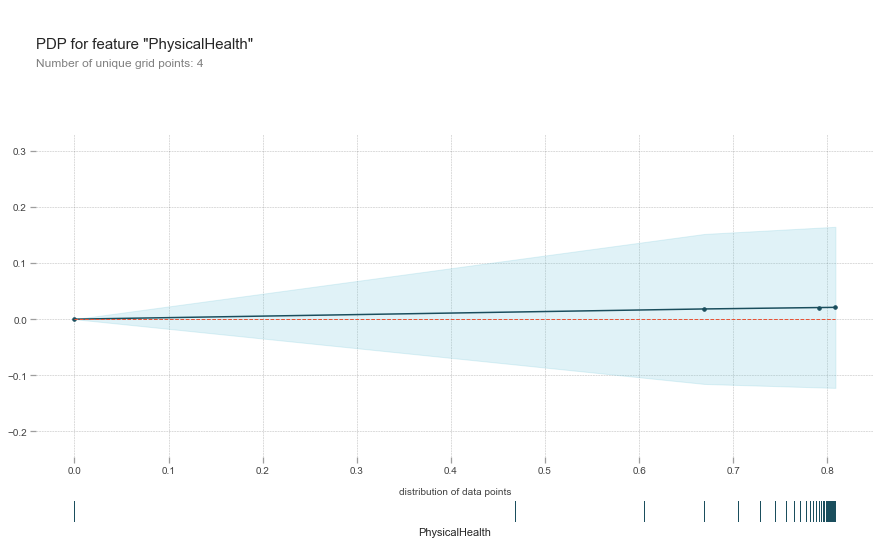

In [23]:
pdp.pdp_plot(pdp_phsical, 'PhysicalHealth', plot_pts_dist=True)

ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (3).

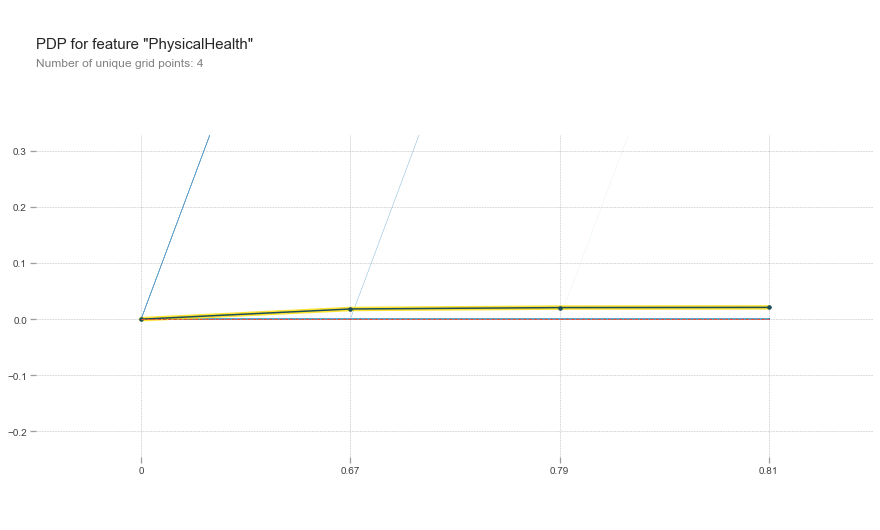

In [53]:
pdp.pdp_plot(pdp_phsical, 'PhysicalHealth',frac_to_plot=1000, plot_lines=True, plot_pts_dist=True,  x_quantile=True)

### MentalHealth

In [54]:
pdp_mental = pdp.pdp_isolate(model=svm_weight_model, dataset=x_test, model_features=features, feature='MentalHealth')

(<Figure size 1080x684 with 3 Axes>,
 {'title_ax': <AxesSubplot:>,
  'pdp_ax': {'_pdp_ax': <AxesSubplot:>,
   '_count_ax': <AxesSubplot:title={'center':'distribution of data points'}, xlabel='MentalHealth'>}})

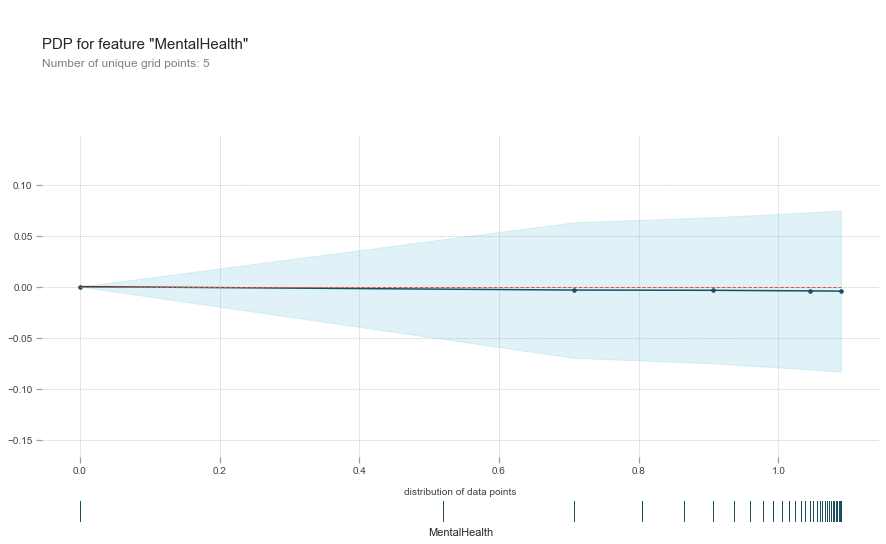

In [101]:
pdp.pdp_plot(pdp_mental, 'MentalHealth', plot_pts_dist=True)

In [ ]:
pdp.pdp_plot(pdp_mental, 'MentalHealth', plot_pts_dist=True, x_quantile=True, show_percentile=True)

### AgeCategory

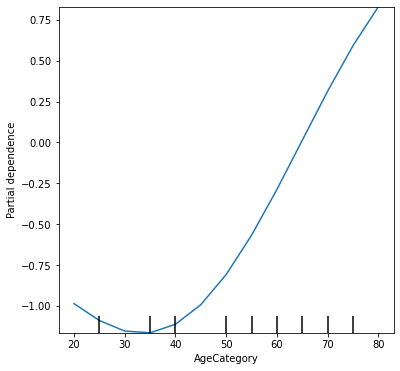

In [13]:
from sklearn.inspection import plot_partial_dependence 
from sklearn.inspection import partial_dependence 
from matplotlib import pyplot as plt 
fig, ax = plt.subplots(figsize=(6, 6))
plot_partial_dependence(estimator=loaded_model, X=x_test, features=['AgeCategory'], 
                        grid_resolution=round(x_test.shape[0]*0.1), percentiles=(0, 1), 
                        kind='average', method='brute',
                        ax=ax);

In [55]:
pdp_age = pdp.pdp_isolate(model=svm_weight_model, dataset=x_test, model_features=features, feature='AgeCategory')

(<Figure size 1080x684 with 3 Axes>,
 {'title_ax': <AxesSubplot:>,
  'pdp_ax': {'_pdp_ax': <AxesSubplot:>,
   '_count_ax': <AxesSubplot:title={'center':'distribution of data points'}, xlabel='AgeCategory'>}})

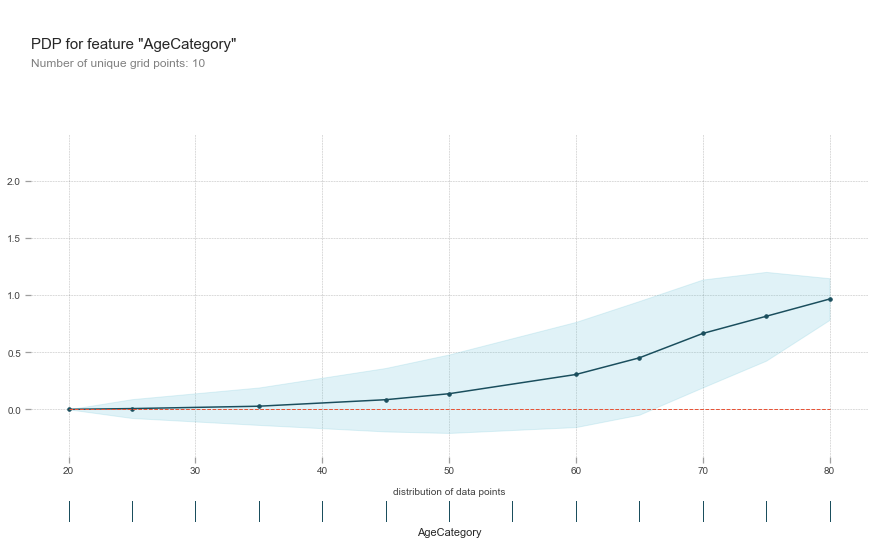

In [102]:
pdp.pdp_plot(pdp_age, 'AgeCategory', plot_pts_dist=True)

### GenHealth

In [56]:
pdp_gen = pdp.pdp_isolate(model=svm_weight_model, dataset=x_test, model_features=features, feature='GenHealth')

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race_encoder'],
      dtype='object')


(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>, 'pdp_ax': <AxesSubplot:xlabel='GenHealth'>})

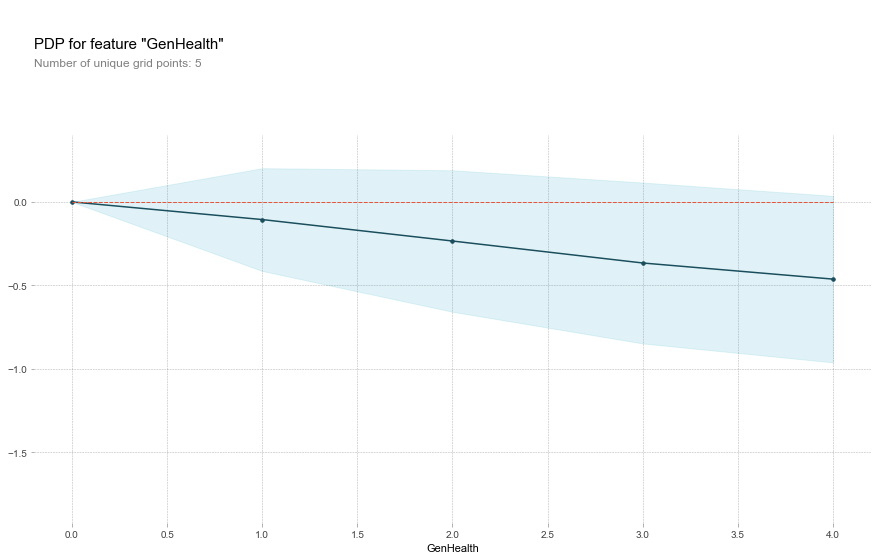

In [12]:
from pdpbox import pdp
feature = 'GenHealth'
features = x_train.columns
pdp_dist = pdp.pdp_isolate(model=loaded_model, dataset=x_test, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature)

In [ ]:
pdp.pdp_plot(pdp_gen, 'GenHealth' ,frac_to_plot=1000, plot_lines=True, plot_pts_dist=True, x_quantile=True, show_percentile=True)

### SleepTime

In [57]:
pdp_sleep = pdp.pdp_isolate(model=svm_weight_model, dataset=x_test, model_features=features, feature='SleepTime')

(<Figure size 1080x684 with 3 Axes>,
 {'title_ax': <AxesSubplot:>,
  'pdp_ax': {'_pdp_ax': <AxesSubplot:>,
   '_count_ax': <AxesSubplot:title={'center':'distribution of data points'}, xlabel='SleepTime'>}})

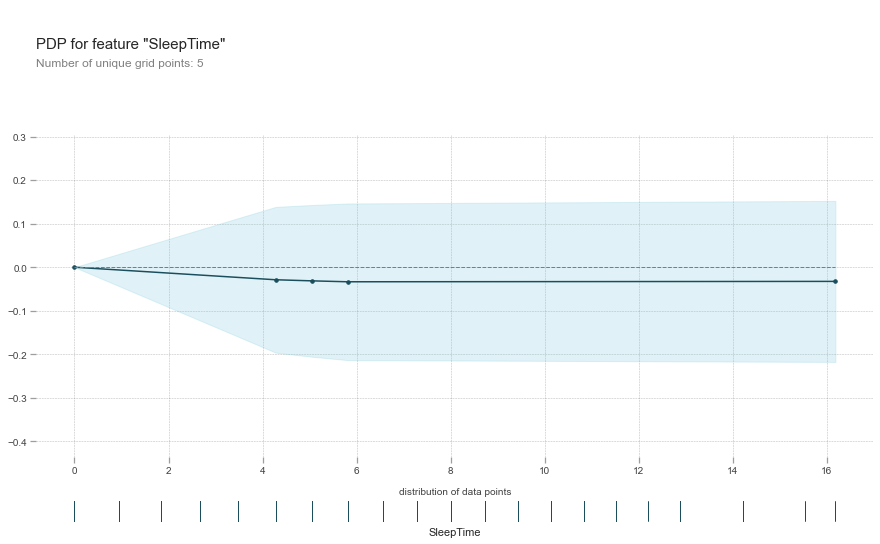

In [138]:
pdp.pdp_plot(pdp_sleep, 'SleepTime', plot_pts_dist=True)

### Race

In [58]:
pdp_race = pdp.pdp_isolate(model=svm_weight_model, dataset=x_test, model_features=features, feature='Race_encoder')

(<Figure size 1080x684 with 3 Axes>,
 {'title_ax': <AxesSubplot:>,
  'pdp_ax': {'_pdp_ax': <AxesSubplot:>,
   '_count_ax': <AxesSubplot:title={'center':'distribution of data points'}, xlabel='Race_encoder'>}})

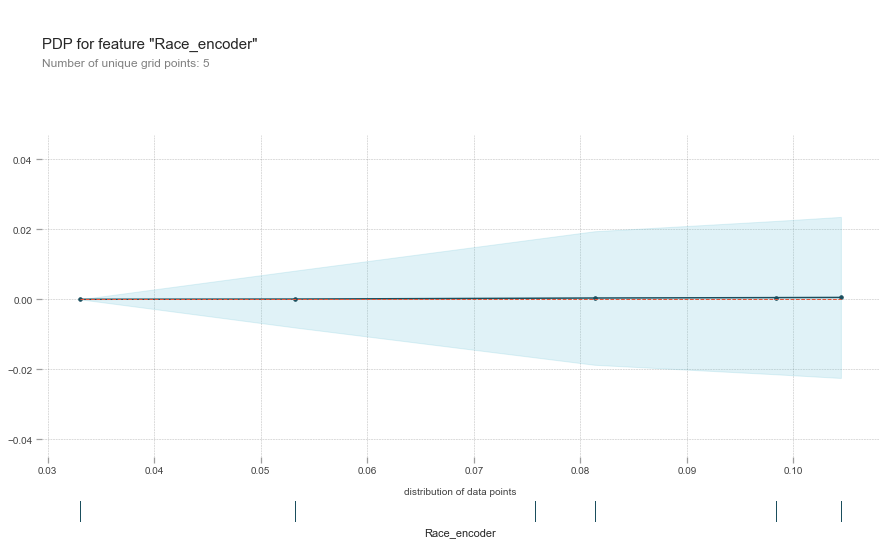

In [60]:
pdp.pdp_plot(pdp_race, 'Race_encoder', plot_pts_dist=True)

In [59]:
pdp_diabetic = pdp.pdp_isolate(model=svm_weight_model, dataset=x_test, model_features=features, feature='Diabetic')

(<Figure size 1080x684 with 3 Axes>,
 {'title_ax': <AxesSubplot:>,
  'pdp_ax': {'_pdp_ax': <AxesSubplot:>,
   '_count_ax': <AxesSubplot:title={'center':'distribution of data points'}, xlabel='Diabetic'>}})

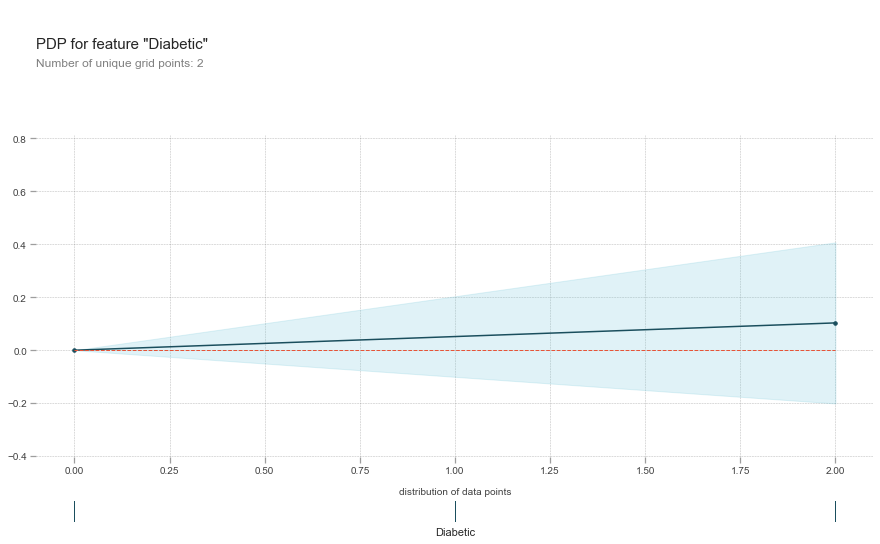

In [63]:
pdp.pdp_plot(pdp_diabetic, 'Diabetic', plot_pts_dist=True)

In [79]:
pdp_smoke = pdp.pdp_isolate(model=svm_weight_model, dataset=x_test, model_features=features, feature='Smoking')

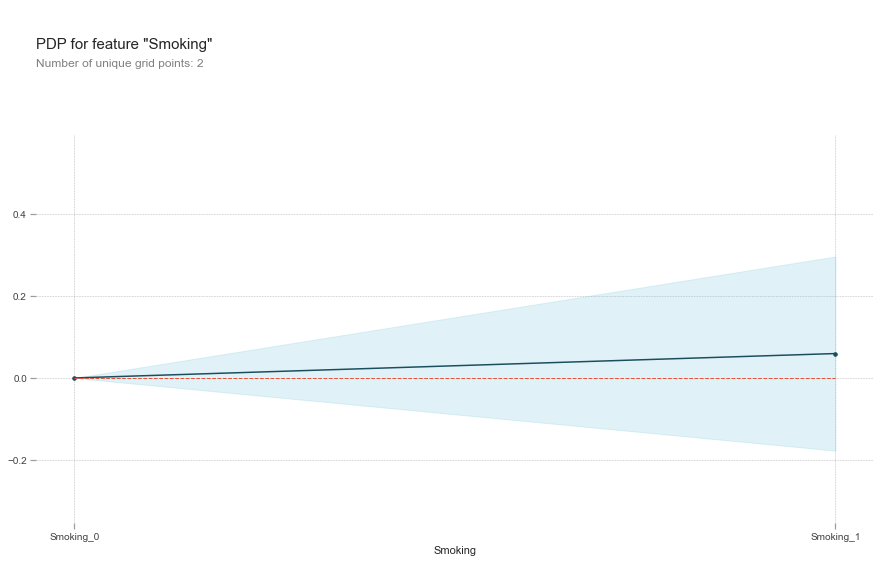

In [119]:
fig, axes = pdp.pdp_plot(pdp_smoke, 'Smoking')

In [80]:
pdp_alcohol = pdp.pdp_isolate(model=svm_weight_model, dataset=x_test, model_features=features, feature='AlcoholDrinking')

ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (2).

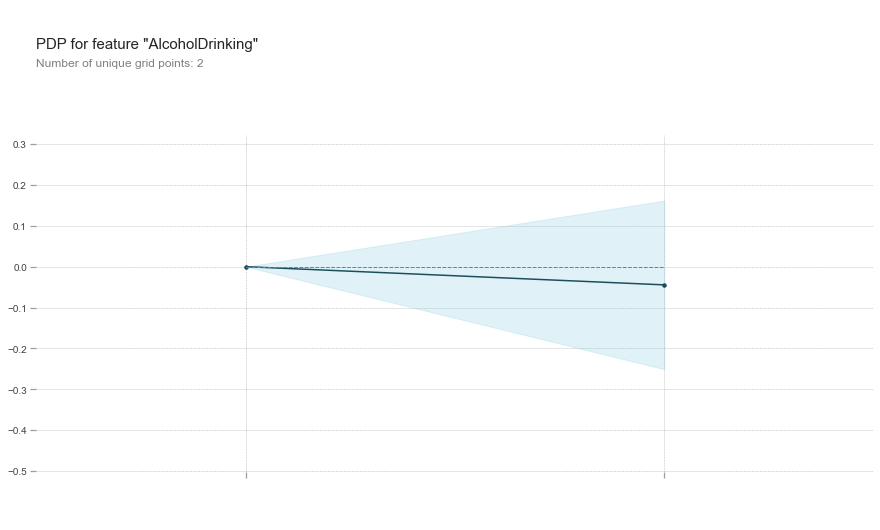

In [120]:
pdp.pdp_plot(pdp_alcohol, 'AlcoholDrinking', plot_pts_dist=True)

In [81]:
pdp_stroke = pdp.pdp_isolate(model=svm_weight_model, dataset=x_test, model_features=features, feature='Stroke')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>, 'pdp_ax': <AxesSubplot:xlabel='Stroke'>})

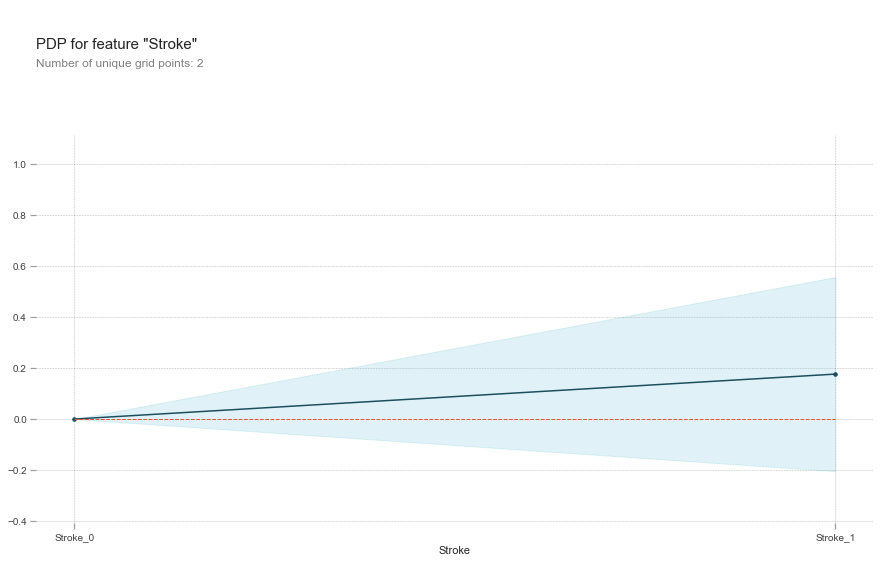

In [121]:
pdp.pdp_plot(pdp_stroke, 'Stroke')

In [82]:
pdp_diff = pdp.pdp_isolate(model=svm_weight_model, dataset=x_test, model_features=features, feature='DiffWalking')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>, 'pdp_ax': <AxesSubplot:xlabel='DiffWalking'>})

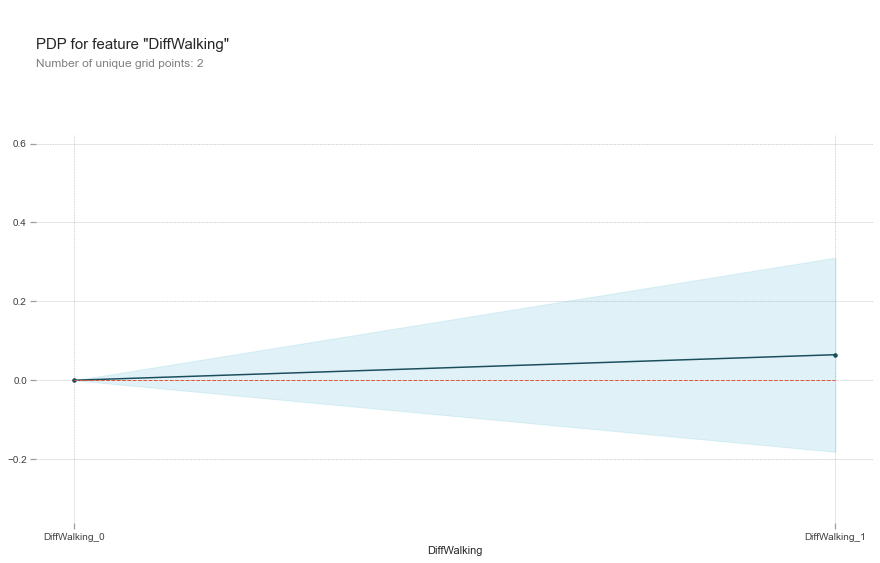

In [122]:
pdp.pdp_plot(pdp_diff, 'DiffWalking')

In [83]:
pdp_gender = pdp.pdp_isolate(model=svm_weight_model, dataset=x_test, model_features=features, feature='Sex')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>, 'pdp_ax': <AxesSubplot:xlabel='Sex'>})

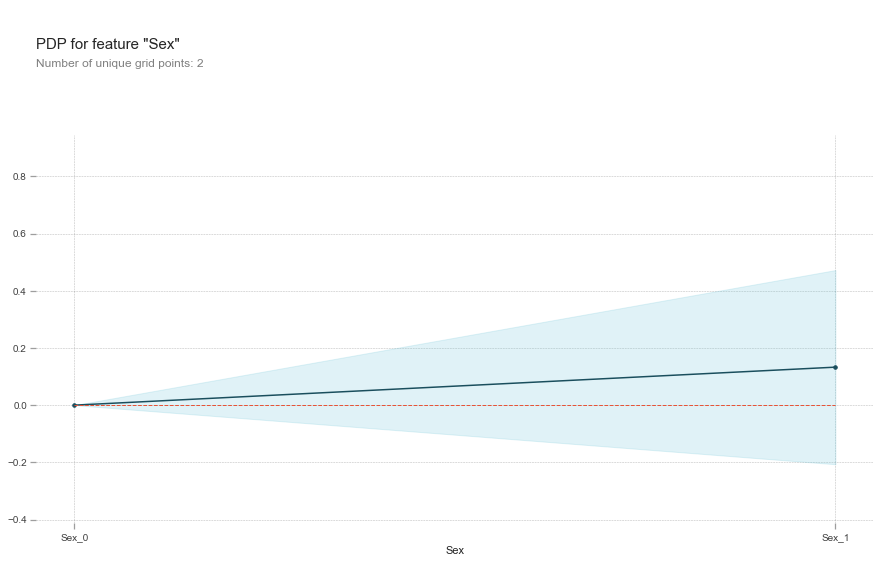

In [125]:
pdp.pdp_plot(pdp_gender, 'Sex')

In [84]:
pdp_PhysicalAct = pdp.pdp_isolate(model=svm_weight_model, dataset=x_test, model_features=features, feature='PhysicalActivity')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>,
  'pdp_ax': <AxesSubplot:xlabel='PhysicalActivity'>})

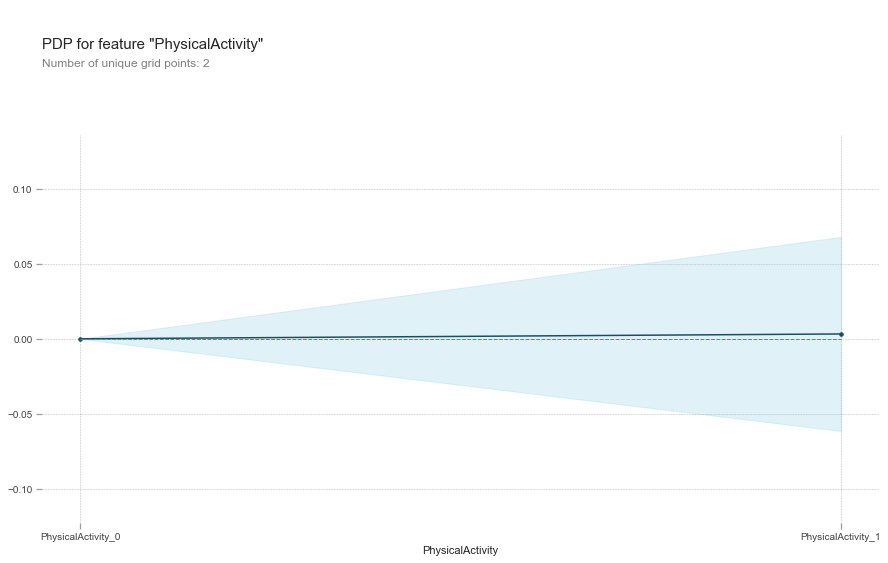

In [127]:
pdp.pdp_plot(pdp_PhysicalAct, 'PhysicalActivity')

In [85]:
pdp_asthma = pdp.pdp_isolate(model=svm_weight_model, dataset=x_test, model_features=features, feature='Asthma')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>, 'pdp_ax': <AxesSubplot:xlabel='Asthma'>})

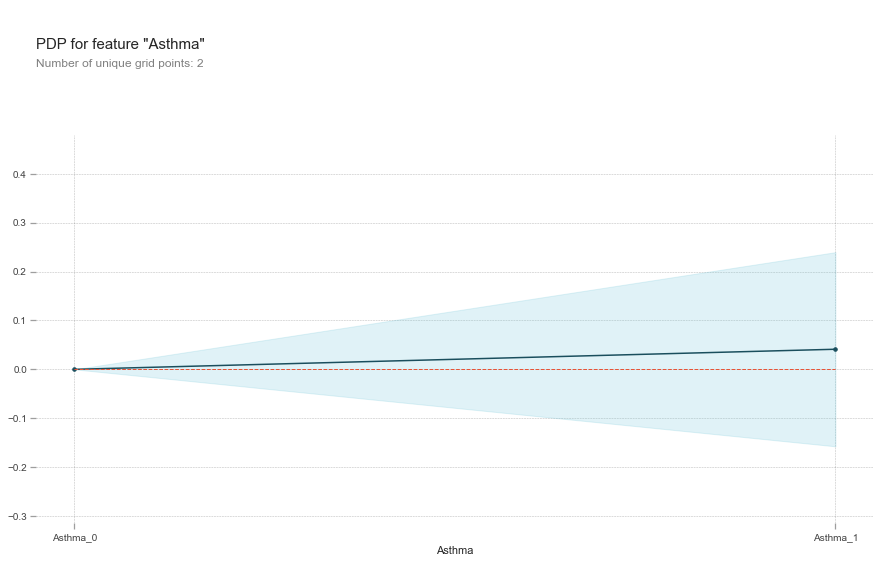

In [128]:
pdp.pdp_plot(pdp_asthma, 'Asthma')

In [86]:
pdp_kidney = pdp.pdp_isolate(model=svm_weight_model, dataset=x_test, model_features=features, feature='KidneyDisease')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>, 'pdp_ax': <AxesSubplot:xlabel='KidneyDisease'>})

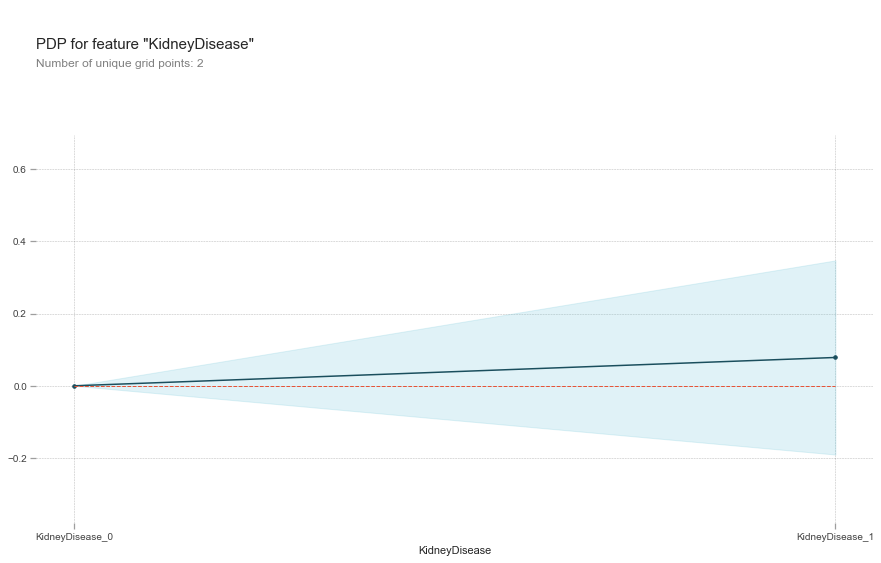

In [130]:
pdp.pdp_plot(pdp_kidney, 'KidneyDisease')

In [87]:
pdp_skin = pdp.pdp_isolate(model=svm_weight_model, dataset=x_test, model_features=features, feature='SkinCancer')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>, 'pdp_ax': <AxesSubplot:xlabel='SkinCancer'>})

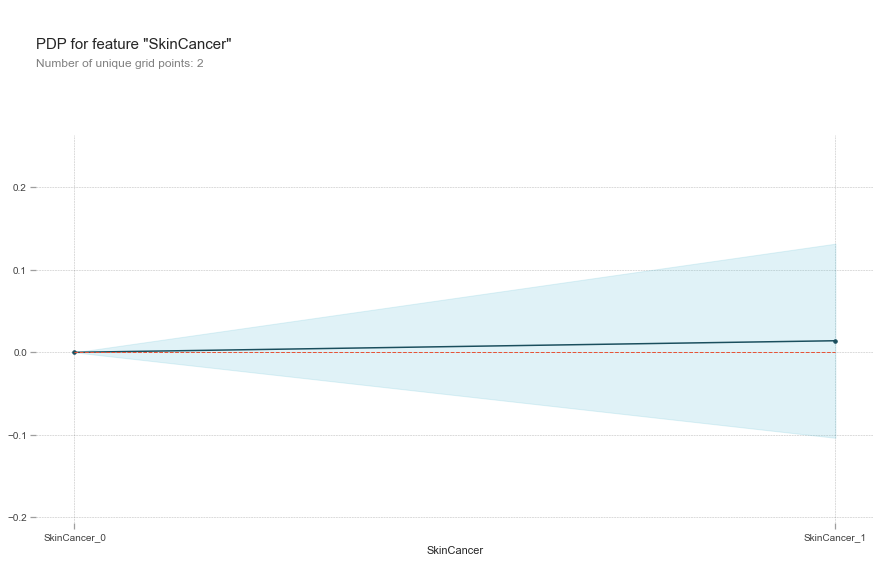

In [132]:
pdp.pdp_plot(pdp_skin, 'SkinCancer')

## SMOTE-ENN 샘플링 적용 모델의 PDPbox 

In [64]:
pdp_enn_bmi = pdp.pdp_isolate(model=svm_smoteenn_model, dataset=x_test, model_features=features, feature='BMI')

(<Figure size 1080x684 with 3 Axes>,
 {'title_ax': <AxesSubplot:>,
  'pdp_ax': {'_pdp_ax': <AxesSubplot:>,
   '_count_ax': <AxesSubplot:title={'center':'distribution of data points'}, xlabel='BMI'>}})

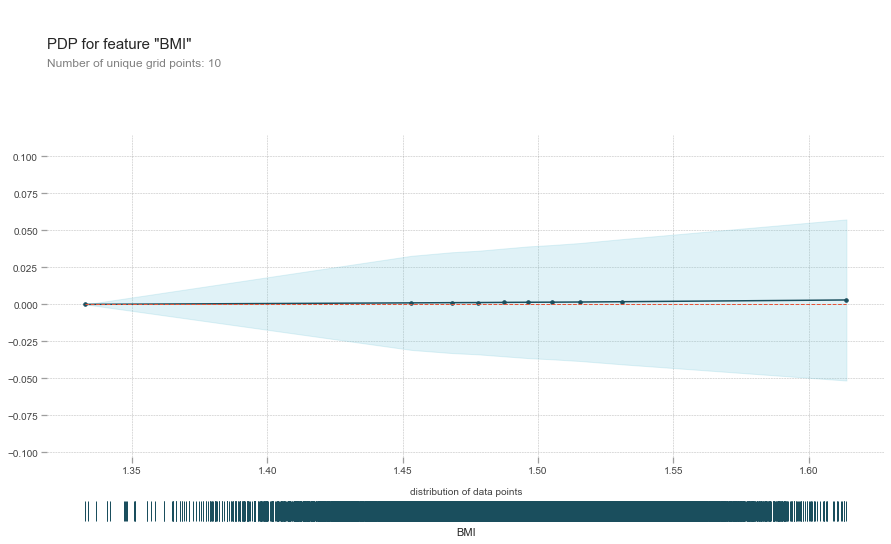

In [66]:
pdp.pdp_plot(pdp_enn_bmi, 'BMI', plot_pts_dist=True)

In [88]:
pdp_enn_phsical = pdp.pdp_isolate(model=svm_smoteenn_model, dataset=x_test, model_features=features, feature='PhysicalHealth')

(<Figure size 1080x684 with 3 Axes>,
 {'title_ax': <AxesSubplot:>,
  'pdp_ax': {'_pdp_ax': <AxesSubplot:>,
   '_count_ax': <AxesSubplot:title={'center':'distribution of data points'}, xlabel='PhysicalHealth'>}})

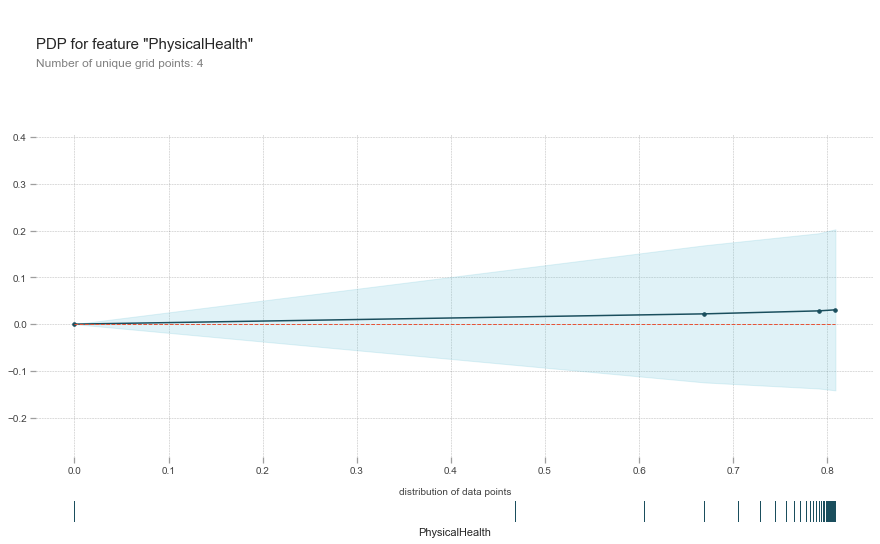

In [133]:
pdp.pdp_plot(pdp_enn_phsical, 'PhysicalHealth', plot_pts_dist=True)

In [89]:
pdp_enn_mental = pdp.pdp_isolate(model=svm_smoteenn_model, dataset=x_test, model_features=features, feature='MentalHealth')

(<Figure size 1080x684 with 3 Axes>,
 {'title_ax': <AxesSubplot:>,
  'pdp_ax': {'_pdp_ax': <AxesSubplot:>,
   '_count_ax': <AxesSubplot:title={'center':'distribution of data points'}, xlabel='MentalHealth'>}})

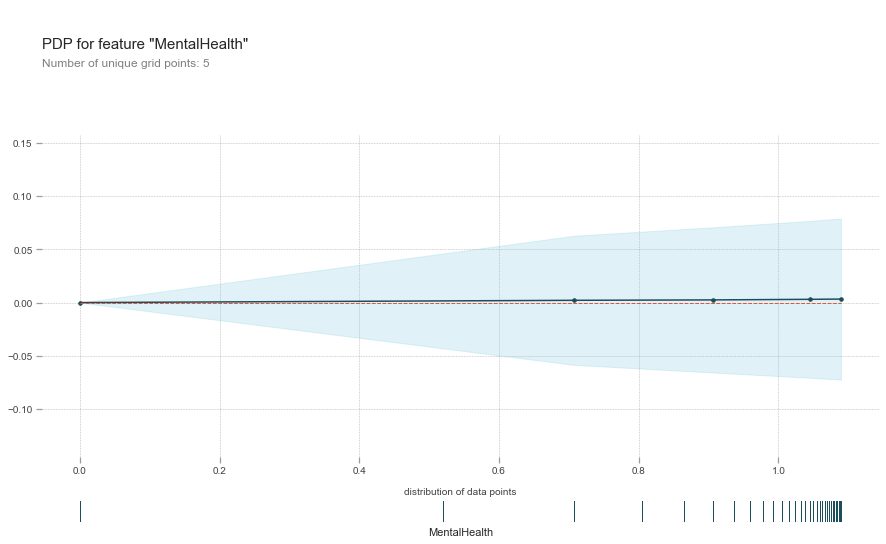

In [134]:
pdp.pdp_plot(pdp_enn_mental, 'MentalHealth', plot_pts_dist=True)

In [90]:
pdp_enn_age = pdp.pdp_isolate(model=svm_smoteenn_model, dataset=x_test, model_features=features, feature='AgeCategory')

(<Figure size 1080x684 with 3 Axes>,
 {'title_ax': <AxesSubplot:>,
  'pdp_ax': {'_pdp_ax': <AxesSubplot:>,
   '_count_ax': <AxesSubplot:title={'center':'distribution of data points'}, xlabel='AgeCategory'>}})

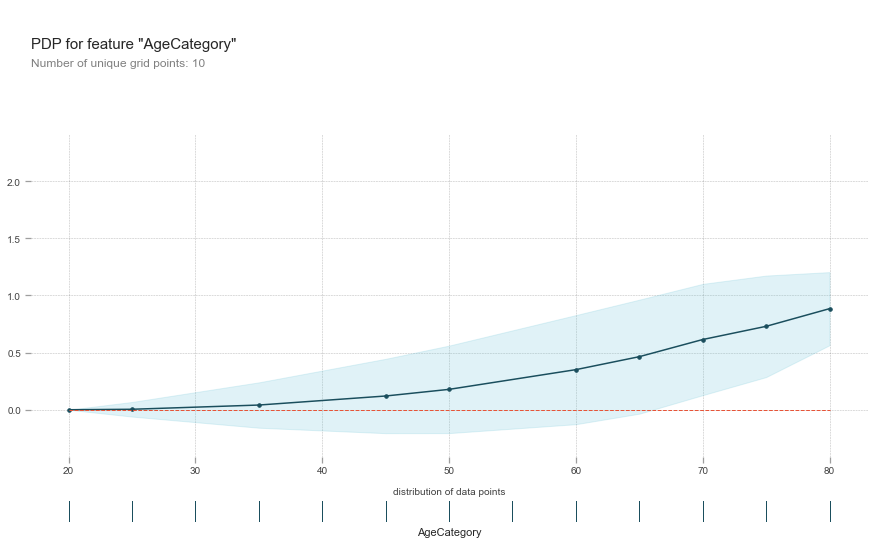

In [135]:
pdp.pdp_plot(pdp_enn_age, 'AgeCategory', plot_pts_dist=True)

In [91]:
pdp_enn_gen = pdp.pdp_isolate(model=svm_smoteenn_model, dataset=x_test, model_features=features, feature='GenHealth')

(<Figure size 1080x684 with 3 Axes>,
 {'title_ax': <AxesSubplot:>,
  'pdp_ax': {'_pdp_ax': <AxesSubplot:>,
   '_count_ax': <AxesSubplot:title={'center':'distribution of data points'}, xlabel='GenHealth'>}})

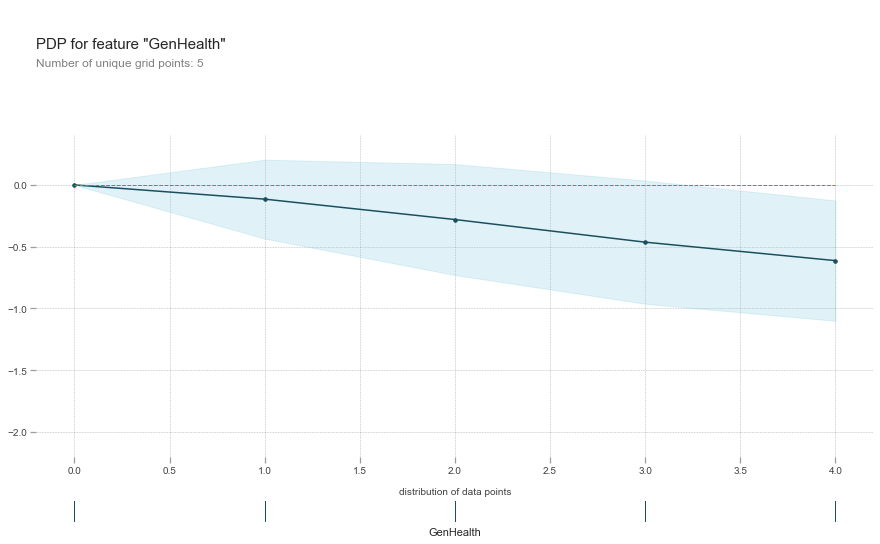

In [136]:
pdp.pdp_plot(pdp_enn_gen, 'GenHealth', plot_pts_dist=True)

In [92]:
pdp_enn_sleep = pdp.pdp_isolate(model=svm_smoteenn_model, dataset=x_test, model_features=features, feature='SleepTime')

(<Figure size 1080x684 with 3 Axes>,
 {'title_ax': <AxesSubplot:>,
  'pdp_ax': {'_pdp_ax': <AxesSubplot:>,
   '_count_ax': <AxesSubplot:title={'center':'distribution of data points'}, xlabel='SleepTime'>}})

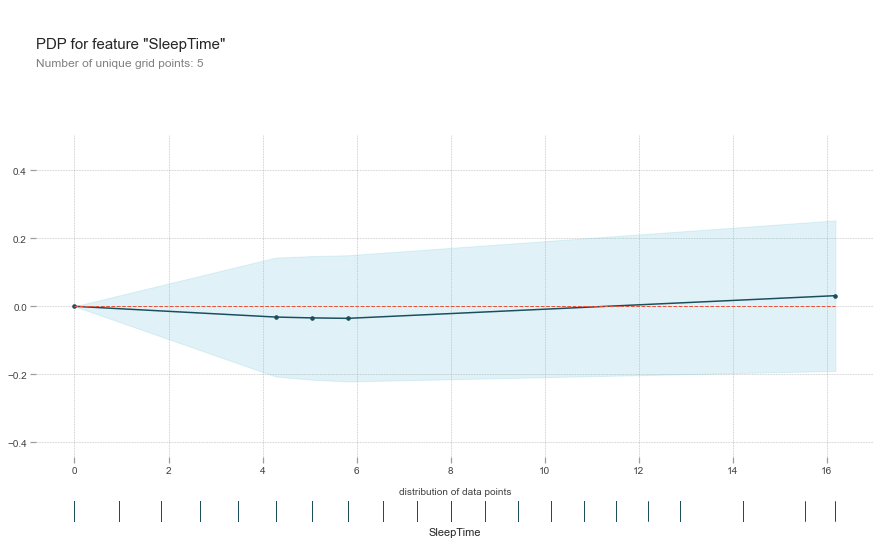

In [137]:
pdp.pdp_plot(pdp_enn_sleep, 'SleepTime', plot_pts_dist=True)

In [93]:
pdp_enn_race = pdp.pdp_isolate(model=svm_smoteenn_model, dataset=x_test, model_features=features, feature='Race_encoder')

(<Figure size 1080x684 with 3 Axes>,
 {'title_ax': <AxesSubplot:>,
  'pdp_ax': {'_pdp_ax': <AxesSubplot:>,
   '_count_ax': <AxesSubplot:title={'center':'distribution of data points'}, xlabel='Race_encoder'>}})

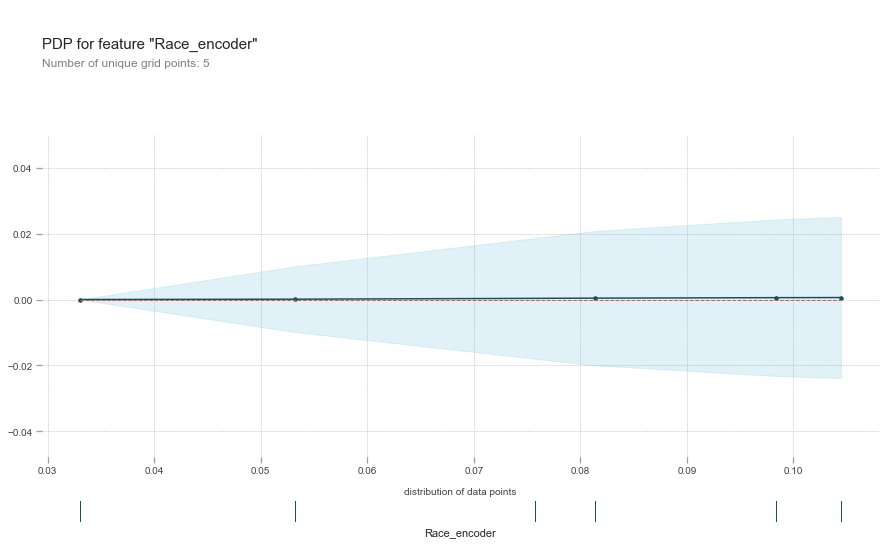

In [139]:
pdp.pdp_plot(pdp_enn_race, 'Race_encoder', plot_pts_dist=True)

In [94]:
pdp_enn_diabetic = pdp.pdp_isolate(model=svm_smoteenn_model, dataset=x_test, model_features=features, feature='Diabetic')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>, 'pdp_ax': <AxesSubplot:xlabel='Diabetic'>})

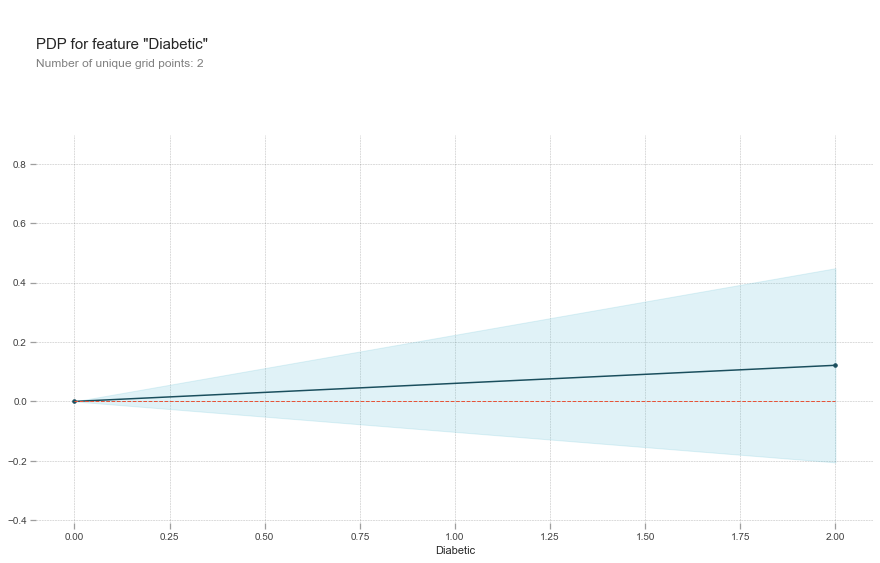

In [142]:
pdp.pdp_plot(pdp_enn_diabetic, 'Diabetic')

In [19]:
from pdpbox import pdp
features=x_test.columns
pdp_enn_smoke = pdp.pdp_isolate(model=svm_smoteenn_model, dataset=x_test, model_features=features, feature='Smoking')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>, 'pdp_ax': <AxesSubplot:xlabel='Smoking'>})

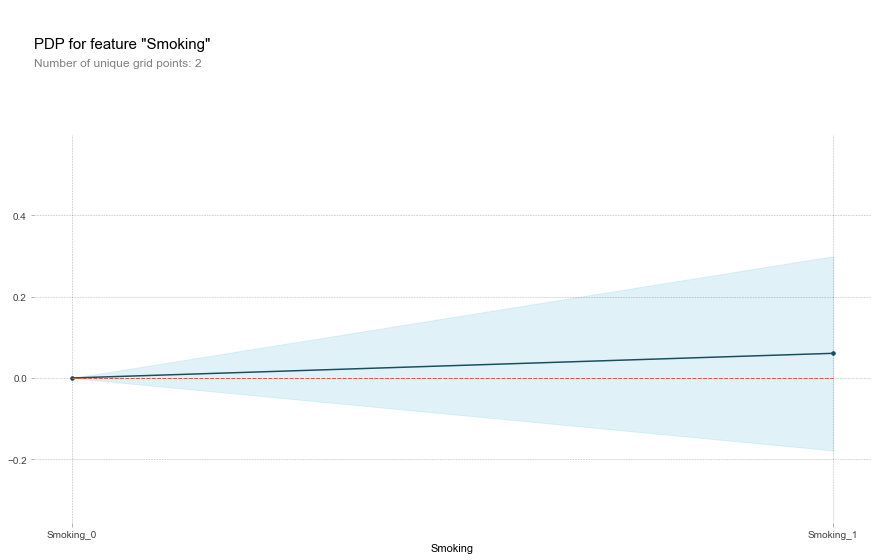

In [28]:
pdp.pdp_plot(pdp_enn_smoke, 'Smoking')

In [20]:
pdp_enn_alcohol = pdp.pdp_isolate(model=svm_smoteenn_model, dataset=x_test, model_features=features, feature='AlcoholDrinking')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>,
  'pdp_ax': <AxesSubplot:xlabel='AlcoholDrinking'>})

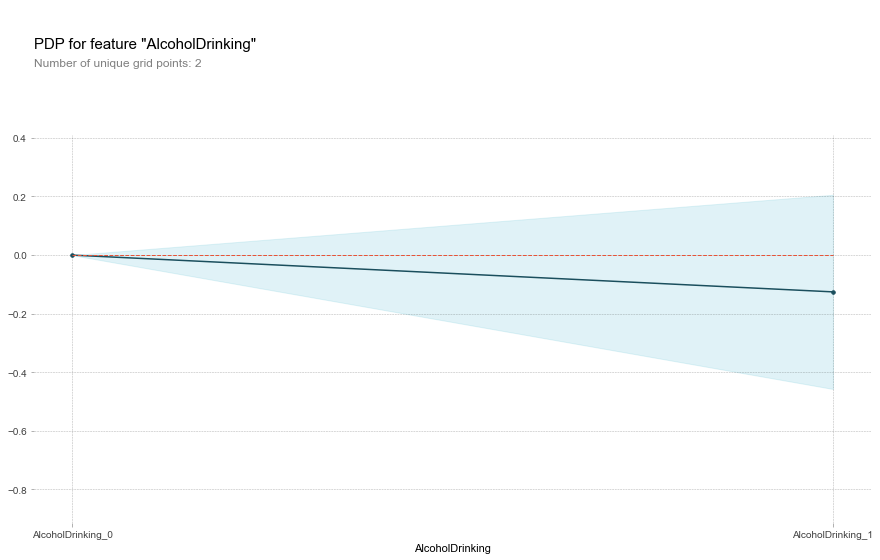

In [29]:
pdp.pdp_plot(pdp_enn_alcohol, 'AlcoholDrinking')

In [21]:
pdp_enn_stroke = pdp.pdp_isolate(model=svm_smoteenn_model, dataset=x_test, model_features=features, feature='Stroke')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>, 'pdp_ax': <AxesSubplot:xlabel='Stroke'>})

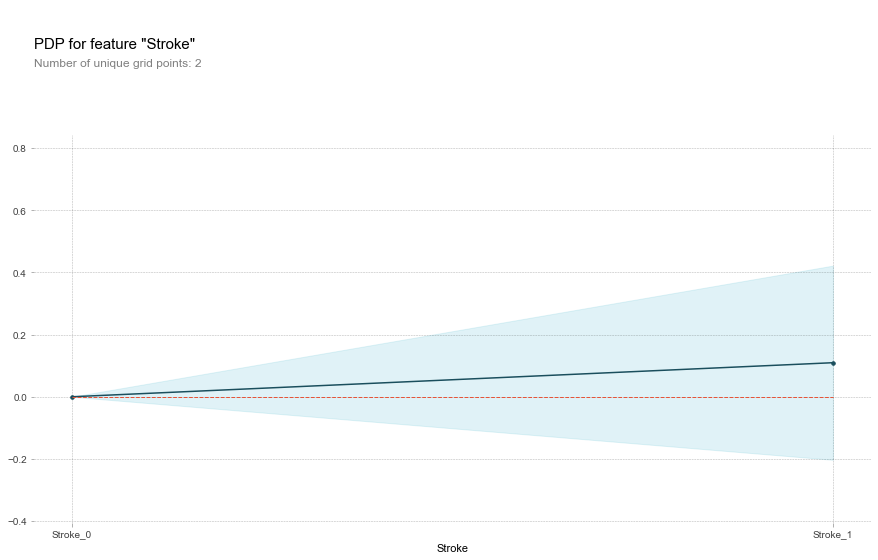

In [30]:
pdp.pdp_plot(pdp_enn_stroke, 'Stroke')

In [22]:
pdp_enn_diff = pdp.pdp_isolate(model=svm_smoteenn_model, dataset=x_test, model_features=features, feature='DiffWalking')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>, 'pdp_ax': <AxesSubplot:xlabel='DiffWalking'>})

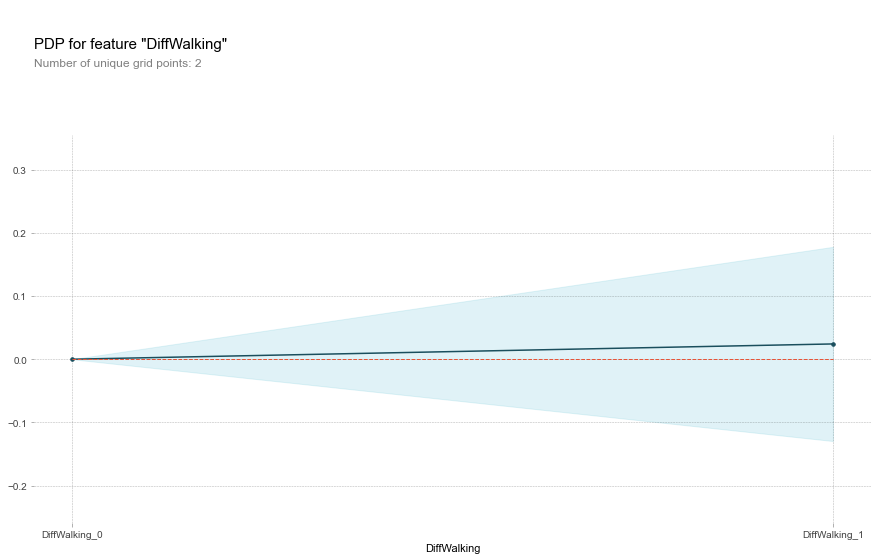

In [31]:
pdp.pdp_plot(pdp_enn_diff, 'DiffWalking')

In [23]:
pdp_enn_gender = pdp.pdp_isolate(model=svm_smoteenn_model, dataset=x_test, model_features=features, feature='Sex')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>, 'pdp_ax': <AxesSubplot:xlabel='Sex'>})

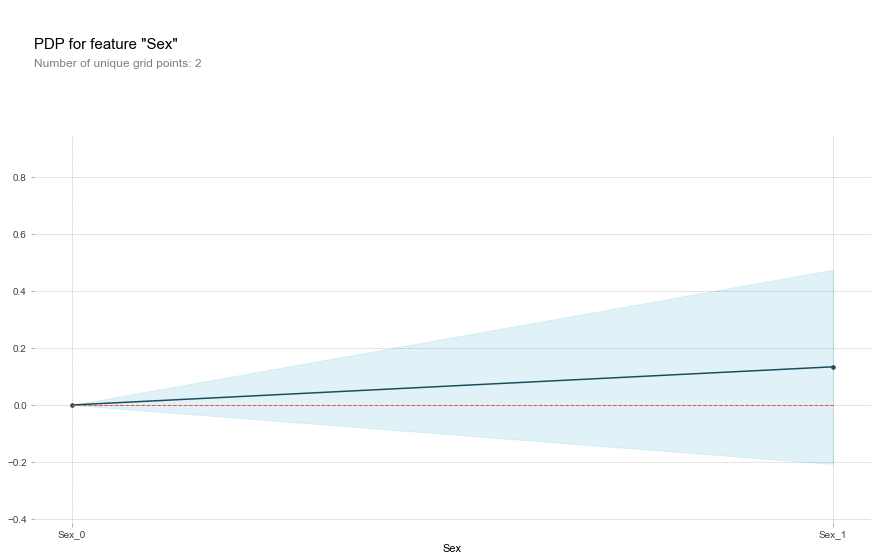

In [32]:
pdp.pdp_plot(pdp_enn_gender, 'Sex')

In [24]:
pdp_enn_PhysicalAct = pdp.pdp_isolate(model=svm_smoteenn_model, dataset=x_test, model_features=features, feature='PhysicalActivity')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>,
  'pdp_ax': <AxesSubplot:xlabel='PhysicalActivity'>})

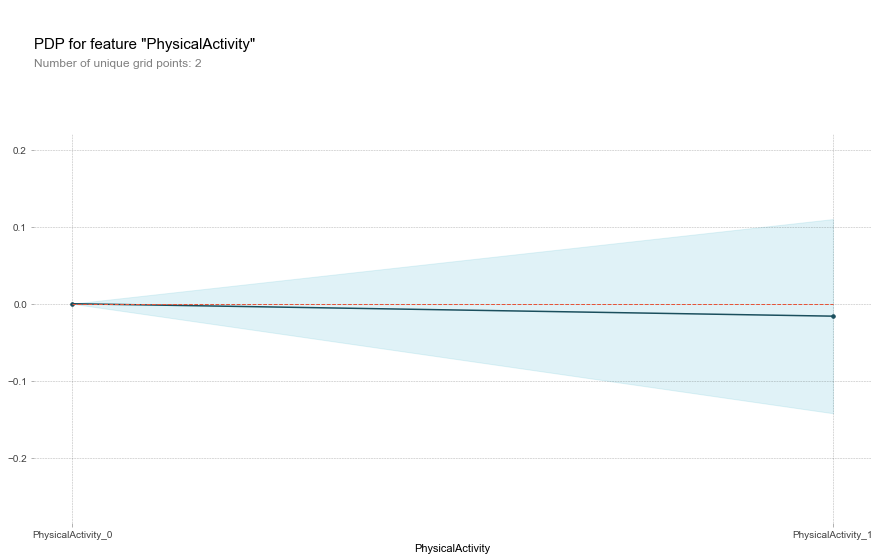

In [33]:
pdp.pdp_plot(pdp_enn_PhysicalAct, 'PhysicalActivity')

In [25]:
pdp_enn_asthma = pdp.pdp_isolate(model=svm_smoteenn_model, dataset=x_test, model_features=features, feature='Asthma')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>, 'pdp_ax': <AxesSubplot:xlabel='Asthma'>})

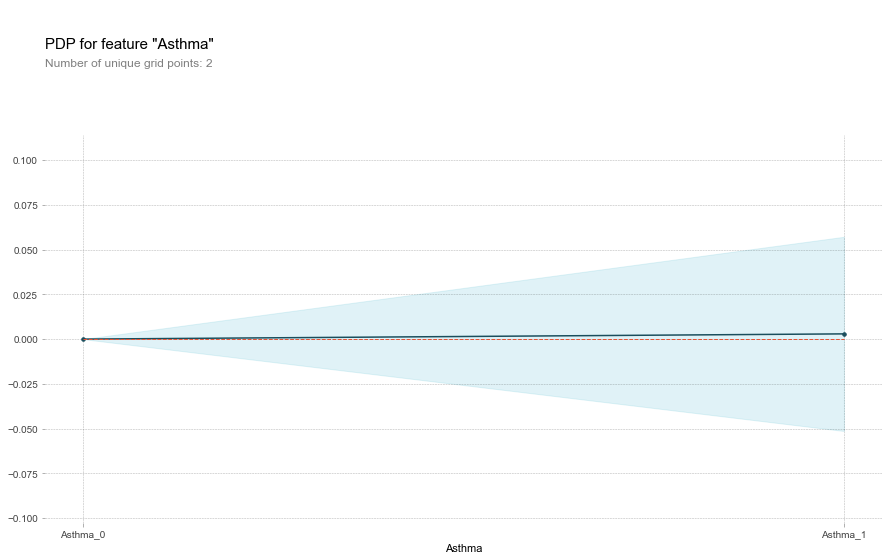

In [34]:
pdp.pdp_plot(pdp_enn_asthma, 'Asthma')

In [26]:
pdp_enn_kidney = pdp.pdp_isolate(model=svm_smoteenn_model, dataset=x_test, model_features=features, feature='KidneyDisease')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>, 'pdp_ax': <AxesSubplot:xlabel='KidneyDisease'>})

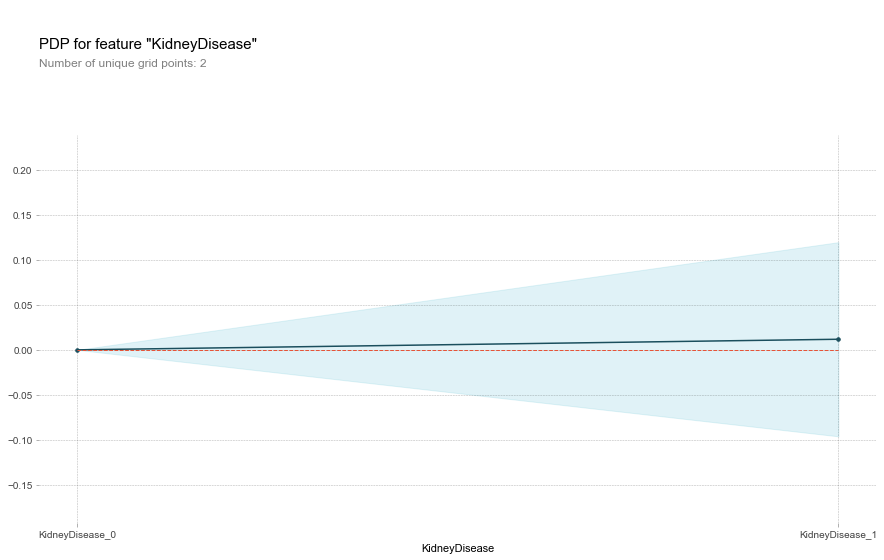

In [35]:
pdp.pdp_plot(pdp_enn_kidney, 'KidneyDisease')

In [27]:
pdp_enn_skin = pdp.pdp_isolate(model=svm_smoteenn_model, dataset=x_test, model_features=features, feature='SkinCancer')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>, 'pdp_ax': <AxesSubplot:xlabel='SkinCancer'>})

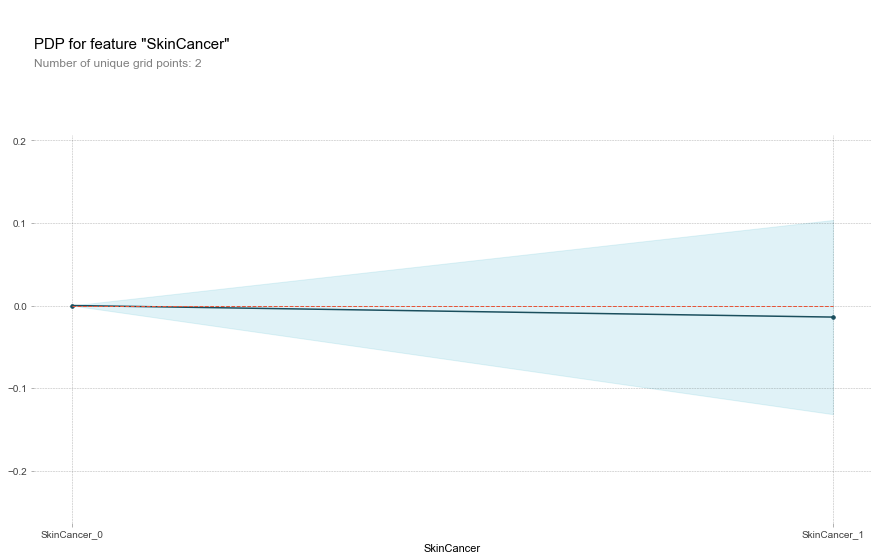

In [36]:
pdp.pdp_plot(pdp_enn_skin, 'SkinCancer')

## Test

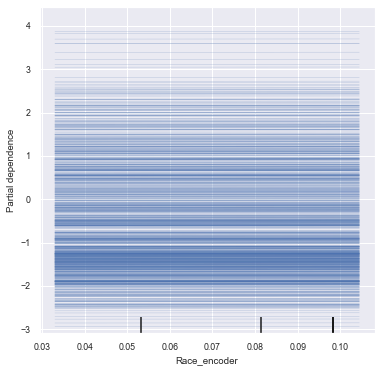

In [72]:
from sklearn.inspection import plot_partial_dependence 
from sklearn.inspection import partial_dependence 
from matplotlib import pyplot as plt 
res = partial_dependence(estimator=svm_smoteenn_model, X=x_test, features=['Race_encoder'], 
                        grid_resolution=round(x_test.shape[0]*0.1), percentiles=(0, 1), 
                        kind='individual', method='brute');

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_partial_dependence(estimator=model, X=X, features=['RM'], 
                        grid_resolution=round(X.shape[0]*0.1), percentiles=(0, 1), 
                        kind='individual', method='brute',
                        ax=ax)
res = partial_dependence(estimator=model, X=X, features=['RM'], 
                         grid_resolution=round(X.shape[0]*0.1), percentiles=(0, 1), 
                         kind='average', method='brute')
plt.plot(res['values'][0], res['average'][0], color='red');

## SHAP

In [ ]:
# SHAP
import shap
features = x_train.columns
explainer = shap.KernelExplainer(svm_weight_model.decision_function, x_train, link='logit', feature_names=features)

X does not have valid feature names, but SVC was fitted with feature names


In [ ]:
shap.summary_plot(shap_values, x_train)

In [114]:
explainer

In [116]:
%store explainer

Stored 'explainer' (Kernel)


In [117]:
%store -r explainer

Stored variables and their in-db values:
explainer             -> <shap.explainers._kernel.Kernel object at 0x000002
